# Road accident severity

**Gathering Data**

Selected key variables:

The dataset `Accident_Information.csv` contains 34 variables and around 2 million records.  
Each row represents one road accident reported in the United Kingdom.  
The table below lists the **12 key variables** most relevant for analysis and modeling.

| Variable | Description | Type | Measurement Level |
|-----------|--------------|------|-------------------|
| Accident_Index | Unique identifier for each accident | object | ID |
| Date | Date of the accident | datetime | Temporal |
| Time | Time of day (HH:MM) | object | Temporal |
| Day_of_Week | Day when the accident occurred | object | Ordinal |
| Year | Year of the accident | int | Temporal |
| Weather_Conditions | Weather during the accident | object | Nominal |
| Light_Conditions | Lighting at the time of the accident | object | Nominal |
| Road_Surface_Conditions | Condition of the road surface | object | Nominal |
| Urban_or_Rural_Area | Whether the area is urban or rural | object | Nominal |
| Speed_limit | Legal speed limit at the location (mph) | float | Ratio |
| Number_of_Vehicles | Number of vehicles involved | float | Ratio |
| Accident_Severity | Severity level (Slight / Serious / Fatal) | object | Ordinal (Target) |

These features represent the **time, environment, and severity** aspects of accidents and will be used as the core attributes for descriptive and predictive analysis.



In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Accident_Information.csv")

# Preview
df.head()

/var/folders/l5/b55dhrjj3z3f93wcsgqdcvw40000gp/T/ipykernel_48355/4082386834.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Accident_Information.csv")


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No


In [3]:
# Check size and data types
df.info()

# Number of rows and columns
print("Rows:", df.shape[0], "Columns:", df.shape[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [4]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Filter accidents from 2012 to 2017
df = df[(df["Date"].dt.year >= 2012) & (df["Date"].dt.year <= 2017)]

print("Filtered dataset:", df.shape)


Filtered dataset: (837212, 34)


In [5]:
# Remove duplicates based on Accident_Index
df = df.drop_duplicates(subset="Accident_Index", keep="first")
print("After removing duplicates:", df.shape)


After removing duplicates: (837212, 34)


In [6]:
# Remove records with invalid numeric ranges
df = df[
    (df["Number_of_Vehicles"] > 0) &
    (df["Number_of_Casualties"] >= 0) &
    (df["Speed_limit"].between(20, 70))  # valid UK road limits
]

print("After numeric validation:", df.shape)


After numeric validation: (837171, 34)


In [7]:
# Keep records with valid UK latitude/longitude
df = df[
    df["Longitude"].between(-10, 2) &
    df["Latitude"].between(49, 60)
]

print("After coordinate check:", df.shape)


After coordinate check: (836974, 34)


**Verify data availability**

In [10]:
# Count missing values in each column
missing = df.isna().sum().sort_values(ascending=False)

# Calculate percentage of missing data
missing_percent = (df.isna().sum() / len(df) * 100).round(2)

# Combine results
missing_summary = pd.DataFrame({
    'Missing Values': missing,
    'Percent': missing_percent
})

missing_summary.head(10)


,Missing Values,Percent
1st_Road_Class,0,0.00
1st_Road_Number,0,0.00
2nd_Road_Class,338534,40.45
2nd_Road_Number,4797,0.57
Accident_Index,0,0.00
Accident_Severity,0,0.00
Carriageway_Hazards,820125,97.99
Date,0,0.00
Day_of_Week,0,0.00
Did_Police_Officer_Attend_Scene_of_Accident,9,0.00


In [16]:
# Check missing values
df.isna().sum().sort_values(ascending=False).head(10)

# Check unique values for key categorical columns
for col in ["Weather_Conditions", "Light_Conditions", "Road_Surface_Conditions", "Urban_or_Rural_Area", "Accident_Severity"]:
    print(f"\n{col}:\n", df[col].value_counts(dropna=False).head())




Weather_Conditions:
 Weather_Conditions
Fine no high winds       676639
Raining no high winds     96669
Unknown                   18531
Other                     14582
Raining + high winds      11509
Name: count, dtype: int64

Light_Conditions:
 Light_Conditions
Daylight                       610314
Darkness - lights lit          165452
Darkness - no lighting          42985
Darkness - lighting unknown     13297
Darkness - lights unlit          4916
Name: count, dtype: int64

Road_Surface_Conditions:
 Road_Surface_Conditions
Dry                             589271
Wet or damp                     225679
Frost or ice                     13175
Snow                              3890
Data missing or out of range      3725
Name: count, dtype: int64

Urban_or_Rural_Area:
 Urban_or_Rural_Area
Urban          549601
Rural          287372
Unallocated         1
Name: count, dtype: int64

Accident_Severity:
 Accident_Severity
Slight     701627
Serious    125463
Fatal        9884
Name: count, dtype: 

In [17]:
# Quick check for unusual or extreme values
df[["Speed_limit", "Number_of_Vehicles", "Number_of_Casualties"]].describe()


,Speed_limit,Number_of_Vehicles,Number_of_Casualties
count,836974.000000,836974.000000,836974.000000
mean,38.119177,1.835425,1.328721
std,13.938354,0.711949,0.803885
min,20.000000,1.000000,1.000000
25%,30.000000,1.000000,1.000000
50%,30.000000,2.000000,1.000000
75%,40.000000,2.000000,1.000000
max,70.000000,67.000000,93.000000


In [18]:
# Check date parsing and year coverage
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
print("Years range:", df["Date"].dt.year.min(), "-", df["Date"].dt.year.max())

# Count number of records per year
df["Year"].value_counts().sort_index()


Years range: 2012 - 2017


Year
2012    145544
2013    138637
2014    146298
2015    140002
2016    136555
2017    129938
Name: count, dtype: int64

In [20]:
# Check if coordinates are within UK bounds
valid_lat = df["Latitude"].between(49, 60).mean() * 100
valid_lon = df["Longitude"].between(-10, 2).mean() * 100
print(f"Valid Latitude values: {valid_lat:.2f}%")
print(f"Valid Longitude values: {valid_lon:.2f}%")


Valid Latitude values: 100.00%
Valid Longitude values: 100.00%


In [22]:
# Distribution of target variable
df["Accident_Severity"].value_counts(normalize=True).mul(100).round(2)


Accident_Severity
Slight     83.83
Serious    14.99
Fatal       1.18
Name: proportion, dtype: float64

**Exploring Data**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("crest")


/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


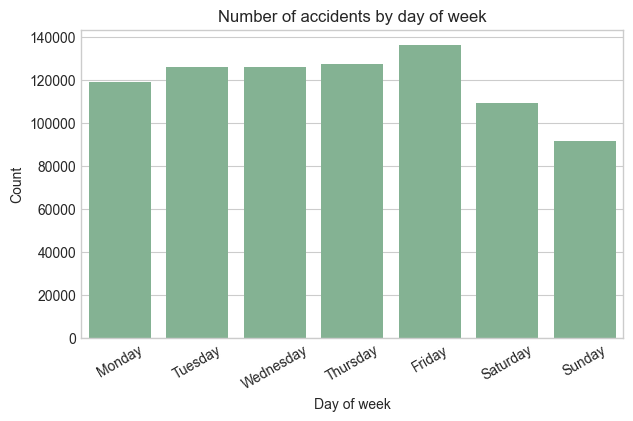

/var/folders/l5/b55dhrjj3z3f93wcsgqdcvw40000gp/T/ipykernel_48355/1716535113.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour


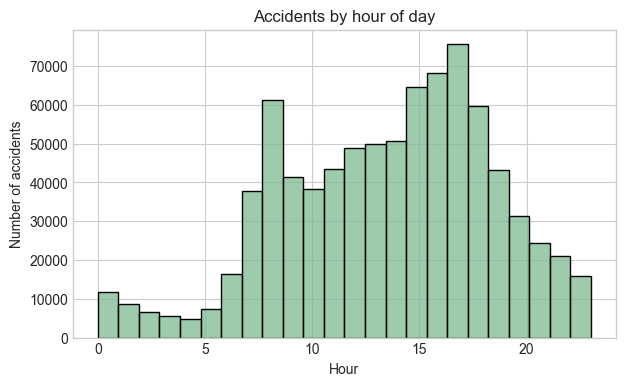

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


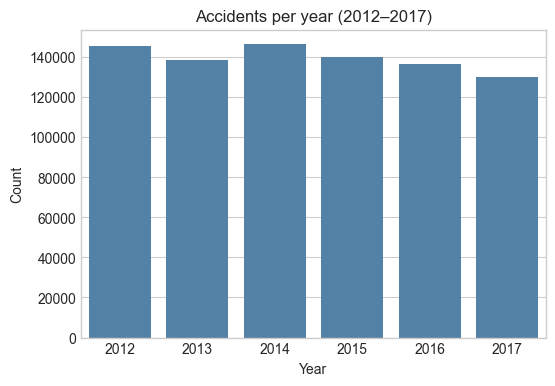

In [24]:
# Accidents by day of week
plt.figure(figsize=(7,4))
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(data=df, x="Day_of_Week", order=order)
plt.title("Number of accidents by day of week")
plt.xlabel("Day of week")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

# Accidents by hour
df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour
plt.figure(figsize=(7,4))
sns.histplot(df["Hour"].dropna(), bins=24, kde=False)
plt.title("Accidents by hour of day")
plt.xlabel("Hour")
plt.ylabel("Number of accidents")
plt.show()

# Accidents by year
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Year", color="steelblue")
plt.title("Accidents per year (2012–2017)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the gr

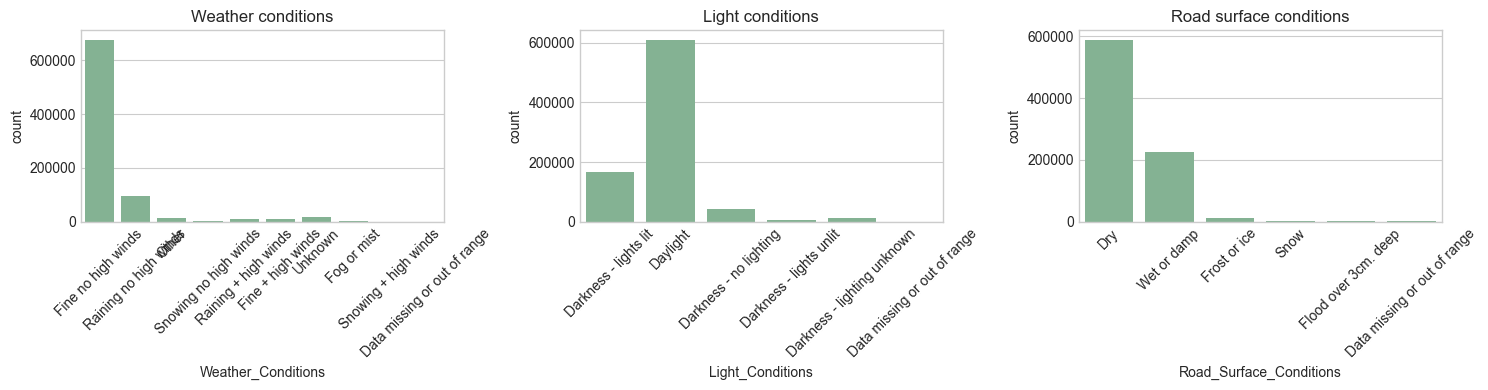

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.countplot(data=df, x="Weather_Conditions", ax=axes[0])
axes[0].set_title("Weather conditions")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x="Light_Conditions", ax=axes[1])
axes[1].set_title("Light conditions")
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x="Road_Surface_Conditions", ax=axes[2])
axes[2].set_title("Road surface conditions")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


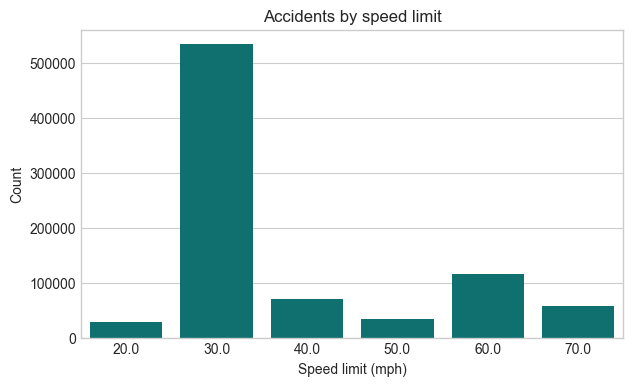

/var/folders/l5/b55dhrjj3z3f93wcsgqdcvw40000gp/T/ipykernel_48355/2220854676.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Accident_Severity", order=["Slight", "Serious", "Fatal"], palette="crest")
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupin

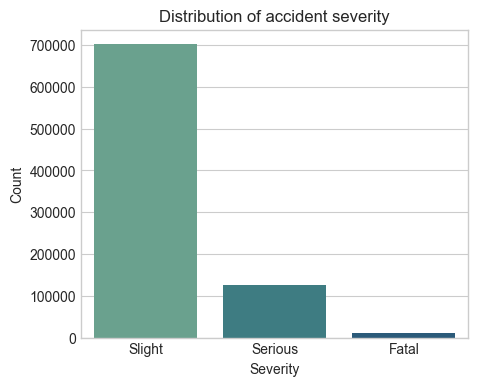

In [26]:
# Distribution of accidents by speed limit
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="Speed_limit", color="teal")
plt.title("Accidents by speed limit")
plt.xlabel("Speed limit (mph)")
plt.ylabel("Count")
plt.show()

# Severity distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Accident_Severity", order=["Slight", "Serious", "Fatal"], palette="crest")
plt.title("Distribution of accident severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()


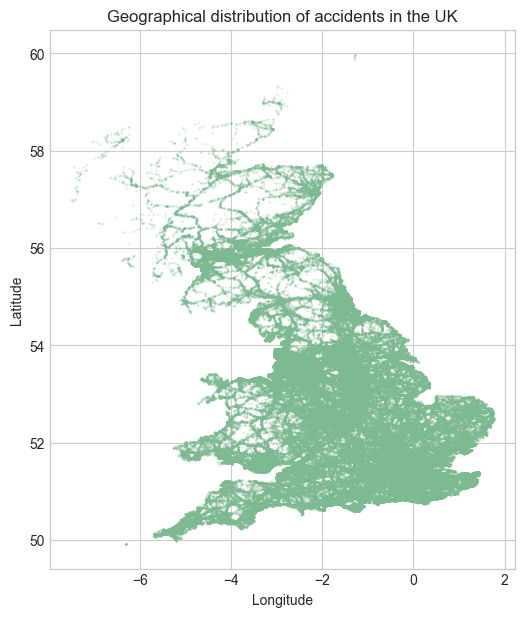

In [27]:
# Scatter plot of coordinates (quick visual check)
plt.figure(figsize=(6,7))
plt.scatter(df["Longitude"], df["Latitude"], s=0.1, alpha=0.5)
plt.title("Geographical distribution of accidents in the UK")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [29]:
summary = {
    "Total accidents": len(df),
    "Years covered": f"{df['Year'].min()} - {df['Year'].max()}",
    "Most common speed limit": df["Speed_limit"].mode()[0],
    "Most common weather": df["Weather_Conditions"].mode()[0],
    "Most common day": df["Day_of_Week"].mode()[0],
    "Most common lighting": df["Light_Conditions"].mode()[0],
}
summary


{'Total accidents': 836974,
 'Years covered': '2012 - 2017',
 'Most common speed limit': 30.0,
 'Most common weather': 'Fine no high winds',
 'Most common day': 'Friday',
 'Most common lighting': 'Daylight'}